
Processing d1.xlsx...

Linear Perceptron Weights: [-0.7 -2.6  5.2  2.2], Bias: -1
Quadratic Perceptron Weights: [-430.4  -284.7   297.42 -281.05 -171.03], Bias: -176

Processing d2.xlsx...

Linear Perceptron Weights: [-2.4  7.8], Bias: -1


<ipython-input-11-a9c16a2c76f9>:66: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xx, yy, Z, levels=[0], colors='g', linewidths=2, label="Quadratic Decision Boundary")
<ipython-input-11-a9c16a2c76f9>:78: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
<ipython-input-11-a9c16a2c76f9>:66: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xx, yy, Z, levels=[0], colors='g', linewidths=2, label="Quadratic Decision Boundary")
<ipython-input-11-a9c16a2c76f9>:78: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


Quadratic Perceptron Weights: [-1.1   8.2  -6.67 12.36 24.44], Bias: 0

Processing d3.xlsx...

Linear Perceptron Weights: [  53.6 -123. ], Bias: 97
Quadratic Perceptron Weights: [1150.3   349.9   232.69 -514.55 -514.91], Bias: 136


<ipython-input-11-a9c16a2c76f9>:66: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xx, yy, Z, levels=[0], colors='g', linewidths=2, label="Quadratic Decision Boundary")
<ipython-input-11-a9c16a2c76f9>:78: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


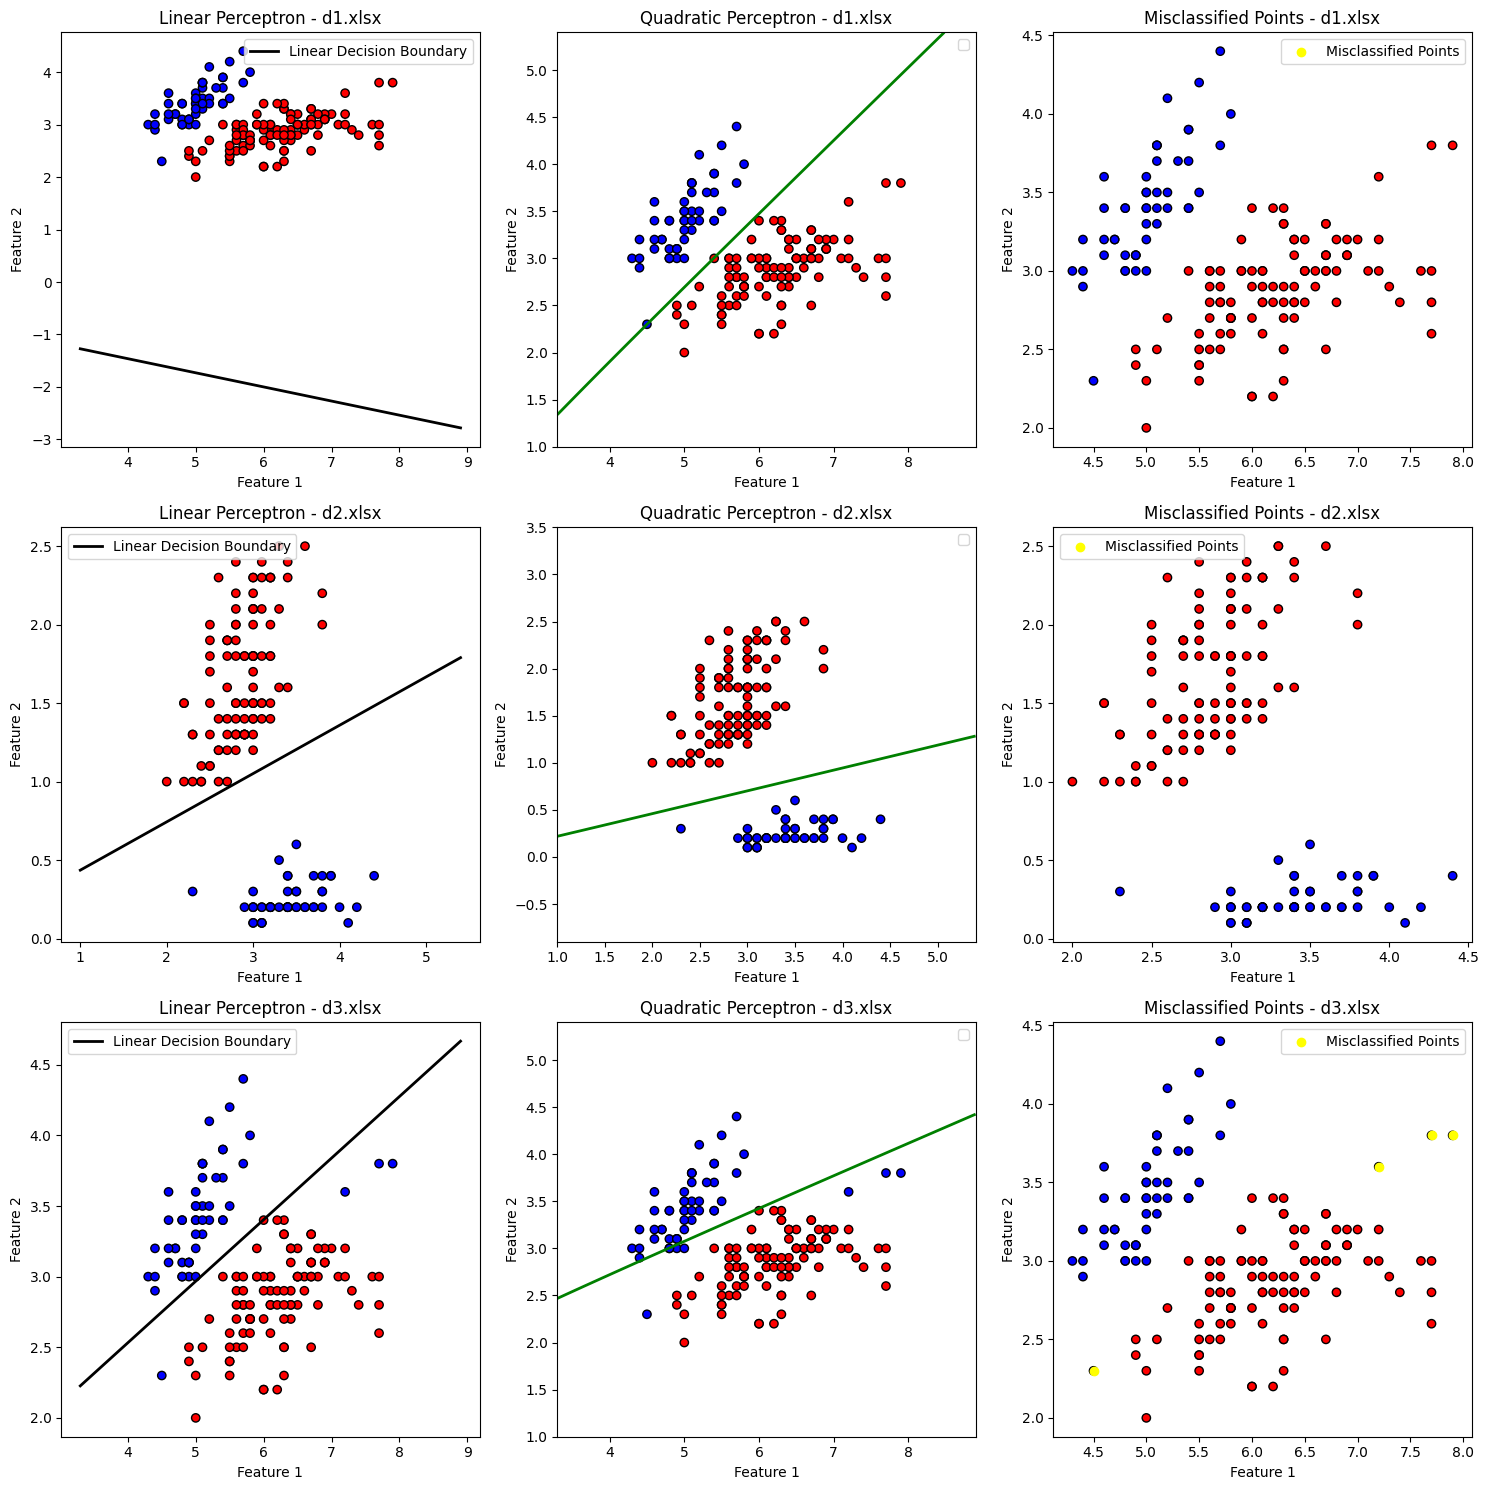

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to load dataset
def load_data(file_path):
    """Loads dataset from an Excel file, separating features and labels."""
    df = pd.read_excel(file_path)   # Read Excel file
    X = df.iloc[:, :-1].values  # Extract all columns except the last as features
    y = df.iloc[:, -1].values   # Last column as labels
    y = np.where(y == 0, -1, 1) # Convert labels from {0,1} to {-1,1} for perceptron
    return X, y

# Perceptron learning algorithm
def perceptron(X, y, max_iter=1000):
    """Trains a perceptron classifier with linear decision boundary."""
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)  # Initialize weights to zero
    bias = 0                         # Initialize bias

    for _ in range(max_iter):
        errors = 0  # Count misclassifications
        for i in range(n_samples):
            update = y[i] * (np.dot(X[i], weights) + bias)
            if update <= 0:  # Misclassified point
                weights += y[i] * X[i]  # Update weights
                bias += y[i]  # Update bias
                errors += 1
        if errors == 0:  # Stop early if no misclassifications
            break
    return weights, bias

# Quadratic transformation (for non-linear separability)
def quadratic_transform(X):
    """Transforms features into quadratic form for better separation."""
    # Create interaction terms: (x1*x2), (x1^2), (x2^2)
    x1 = X[:, 0]
    x2 = X[:, 1]
    X_quad = np.column_stack((x1, x2, x1**2, x2**2, x1*x2))  # Add squared features and interaction terms
    return X_quad

# Function to plot decision boundary
def plot_decision_boundary(X, y, weights, bias, ax, title="Decision Boundary", is_quadratic=False):
    """
    Plots the data points and decision boundary in 2D,
    showing the separation based on the current model's decision rule.
    For quadratic transformations, it shows how the quadratic features affect separation.
    """
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', marker='o')

    if is_quadratic:
        # Create a grid of points in the original 2D space for plotting
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

        # Flatten the grid to apply quadratic transformation
        grid_points = np.c_[xx.ravel(), yy.ravel()]
        grid_points_quad = quadratic_transform(grid_points)  # Apply quadratic transformation to the grid

        # Calculate the decision boundary (dot product with weights and bias)
        Z = np.dot(grid_points_quad, weights) + bias
        Z = Z.reshape(xx.shape)  # Reshape it to match the grid shape

        # Plot the decision boundary as a contour
        ax.contour(xx, yy, Z, levels=[0], colors='g', linewidths=2, label="Quadratic Decision Boundary")
    else:
        # For linear decision boundary, plot directly
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x1_range = np.linspace(x_min, x_max, 100)
        x2_range = -(weights[0] * x1_range + bias) / weights[1]

        ax.plot(x1_range, x2_range, 'k-', linewidth=2, label="Linear Decision Boundary")

    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_title(title)
    ax.legend()

# Function to plot misclassified points
def plot_misclassified_points(X, y, weights, bias, ax, title="Misclassified Points"):
    """Plots misclassified points based on the current perceptron model."""
    misclassified = []
    for i in range(len(X)):
        if y[i] * (np.dot(X[i], weights) + bias) <= 0:  # Misclassified point
            misclassified.append(i)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', marker='o')
    ax.scatter(X[misclassified, 0], X[misclassified, 1], color='yellow', label="Misclassified Points")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_title(title)
    ax.legend()

# Load datasets (Assume d1.xlsx, d2.xlsx, d3.xlsx are uploaded to Colab)
datasets = ["d1.xlsx", "d2.xlsx", "d3.xlsx"]

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Loop through datasets and plot
for idx, dataset in enumerate(datasets):
    print(f"\nProcessing {dataset}...\n")

    # Load Data
    X, y = load_data(dataset)

    # Train Perceptron (Linear)
    weights, bias = perceptron(X, y)
    print(f"Linear Perceptron Weights: {weights}, Bias: {bias}")

    # Plot linear decision boundary
    ax = axes[idx, 0]
    plot_decision_boundary(X, y, weights, bias, ax, title=f"Linear Perceptron - {dataset}")

    # Train Perceptron with Quadratic Features
    X_quad = quadratic_transform(X)
    weights_quad, bias_quad = perceptron(X_quad, y)
    print(f"Quadratic Perceptron Weights: {weights_quad}, Bias: {bias_quad}")

    # Plot quadratic decision boundary
    ax = axes[idx, 1]
    plot_decision_boundary(X, y, weights_quad, bias_quad, ax, title=f"Quadratic Perceptron - {dataset}", is_quadratic=True)

    # Plot misclassified points
    ax = axes[idx, 2]
    plot_misclassified_points(X, y, weights, bias, ax, title=f"Misclassified Points - {dataset}")

# Adjust layout
plt.tight_layout()
plt.show()
